In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Generate synthetic data
np.random.seed(42)
n_samples = 10_000
n_features = 5
X = np.random.rand(n_samples, n_features) * 10  # Input features
true_weights = np.random.randn(n_features, 1)  # True weights for output
true_bias = 5  # True bias
y = X @ true_weights + true_bias + np.random.randn(n_samples, 1) * 0.5  # Add noise

NameError: name 'np' is not defined

In [ ]:

# Split data into training and testing sets
split_ratio = 0.8
split_idx = int(n_samples * split_ratio)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, output_size):
        self.layers = []
        self.biases = []

        # Initialize weights and biases for all layers
        layer_sizes = [input_size] + hidden_layers + [output_size]
        for i in range(len(layer_sizes) - 1):
            self.layers.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.1)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def forward(self, X):
        self.a_values = [X]
        self.z_values = []

        for W, b in zip(self.layers, self.biases):
            z = self.a_values[-1] @ W + b
            self.z_values.append(z)
            a = self.relu(z) if W.shape[1] != 1 else z  # Linear activation for the output
            self.a_values.append(a)
        
        return self.a_values[-1]

    def backward(self, y_true):
        m = y_true.shape[0]
        gradients = {"dW": [], "db": []}
        da = -(2 / m) * (y_true - self.a_values[-1])

        for i in reversed(range(len(self.layers))):
            dz = da * (self.relu_derivative(self.z_values[i]) if i != len(self.layers) - 1 else 1)
            dW = self.a_values[i].T @ dz
            db = np.sum(dz, axis=0, keepdims=True)
            da = dz @ self.layers[i].T

            gradients["dW"].insert(0, dW)
            gradients["db"].insert(0, db)

        return gradients

    def update_weights(self, gradients, lr):
        for i in range(len(self.layers)):
            self.layers[i] -= lr * gradients["dW"][i]
            self.biases[i] -= lr * gradients["db"][i]

In [ ]:
# Hyperparameters
input_size = X_train.shape[1]
hidden_layers = [10, 8]  # Two hidden layers with 10 and 8 neurons
output_size = 1
epochs = 50
lr = 0.01

# Initialize and train the model
nn = NeuralNetwork(input_size, hidden_layers, output_size)
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = nn.forward(X_train)

    # Compute loss (MSE)
    loss = np.mean((y_train - y_pred) ** 2)
    losses.append(loss)

    # Backpropagation
    gradients = nn.backward(y_train)

    # Update weights
    nn.update_weights(gradients, lr)

    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")

Epoch 5/50, Loss: 536.150245
Epoch 10/50, Loss: 308.332102
Epoch 15/50, Loss: 497.680352
Epoch 20/50, Loss: 415.258188
Epoch 25/50, Loss: 347.913279
Epoch 30/50, Loss: 292.887585
Epoch 35/50, Loss: 247.927587
Epoch 40/50, Loss: 211.191995
Epoch 45/50, Loss: 181.176342
Epoch 50/50, Loss: 156.651368


In [ ]:
# Evaluate on test data
y_test_pred = nn.forward(X_test)
test_loss = np.mean((y_test - y_test_pred) ** 2)
print(f"Test Loss: {test_loss:.6f}")

Test Loss: 151.775508


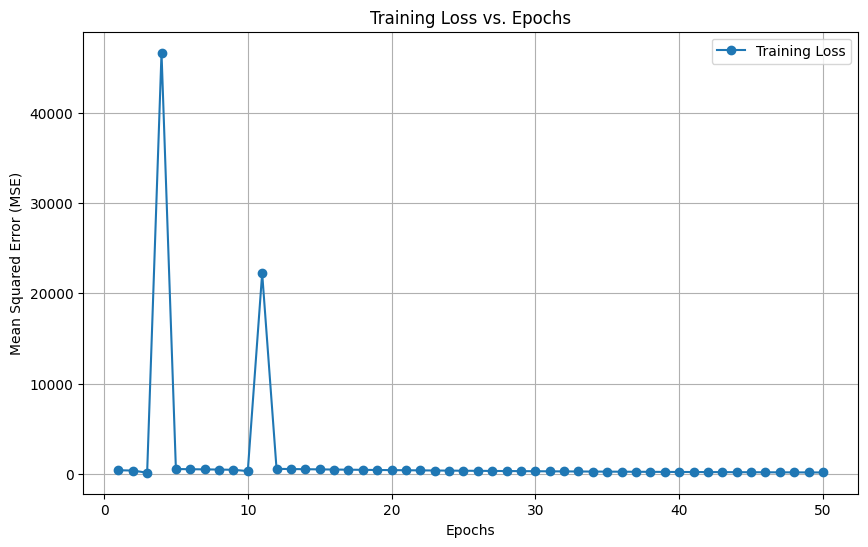

In [ ]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, marker="o", label="Training Loss")
plt.title("Training Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()